In [ ]:
# import libraries
import matplotlib.pyplot as plt
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay
from openpile.utils.py_curves import api_sand
from openpile.analyses import simple_winkler_analysis


In [ ]:
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay

# create pile
pile = Pile.create(
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={"length": [40], "diameter": [2], "wall thickness": [0.08]},
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_elevation=15,
    layers=[
        Layer(
            name="Layer 1 - medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, Neq=100),
        ),
        Layer(
            name="Layer 2 - Firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, Neq=100),
        ),
    ],
)

print(sp)


In [ ]:
# Create Model
M = Model.create(name="", pile=pile, soil=sp)

# create point load
M.set_support(elevation=-30, Tx=True)
# M.set_support(elevation=0, Rz = True)
# M.set_pointdisplacement(elevation=0, Ty=0.1)
M.set_pointload(elevation=0, Px=-20000, Py=10e3)


In [ ]:
result = simple_winkler_analysis(model=M)


In [ ]:
result.plot()


In [ ]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay

# Create a layer
layer1 = Layer(
    name="Soft Clay",
    top=0,
    bottom=-10,
    weight=18,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], Neq=100),
)

print(layer1)


In [ ]:
M.global_restrained


Text(0.5, 0, 'z [m]')

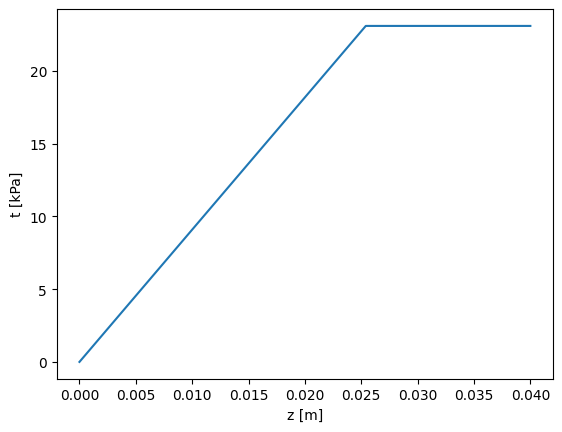

In [2]:
import matplotlib.pyplot as plt
from openpile.utils.tz_curves import api_sand

t, z = api_sand(50, 30)

plt.plot(z, t)
plt.ylabel("t [kPa]")
plt.xlabel("z [m]")


In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [10, 30],
        "diameter": [7.5, 7.5],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_elevation=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, Neq=100),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, Neq=100),
        ),
    ],
)

# Create Model
M = Model.create(name="", pile=p, soil=sp, distributed_moment=True)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral load
M.set_pointload(elevation=0, Px=-20e3, Py=5e3)

# Run analysis
from openpile.analyses import simple_winkler_analysis

Result = simple_winkler_analysis(M)

Result.plot()


In [ ]:
M.py_springs


In [ ]:
layer = Layer(
    name="Soft Clay",
    top=-10,
    bottom=0,
    weight=19,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], Neq=100),
)


In [1]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [10, 30],
        "diameter": [1, 1],
        "wall thickness": [0.5, 0.5],
    },
)

p.area


0.7853981633974483

Converged at iteration no. 2


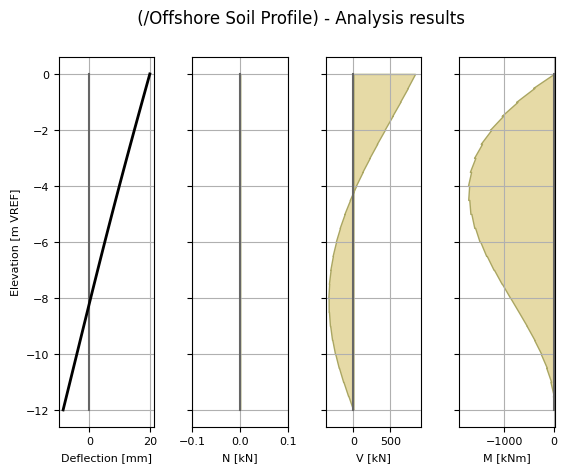

In [30]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Dunkirk_sand, Cowden_clay

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [6, 6],
        "diameter": [2.0, 2.0],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_elevation=15,
    layers=[
        Layer(
            name="",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=Cowden_clay(Su=75, G0=60e3),
        ),
    ],
)


# Create Model
M = Model.create(
    name="",
    pile=p,
    soil=sp,
    coarseness=0.5,
)

# Apply bottom fixity along x-axis
M.set_support(elevation=-10, Tx=True)
# Apply axial and lateral load
# M.set_pointload(elevation=0, Px=-1e3, Py=0.92e3)
# M.set_pointdisplacement(elevation=0, Ty=0.02)
# Run analysis
from openpile.analyses import simple_winkler_analysis

Result = simple_winkler_analysis(M)

Result.plot()


In [54]:
from openpile.utils.Mb_curves import cowden_clay

p, y = cowden_clay(20, 75, 60e3, 3, 20)

p


array([  0.     , 468.45938, 485.62762, 491.3507 , 494.16937, 495.8204 ,
       496.88608, 497.61676, 498.13782, 498.51904, 498.80234, 499.01434,
       499.1729 , 499.29028, 499.3754 , 499.43457, 499.47272, 499.4936 ,
       499.5    , 499.5    ], dtype=float32)

In [65]:
import numpy as np

arr = np.array([[1, 2], [-0, 2]])


In [67]:
(arr < 0).any() and True


False